In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def System(y,x):
    return np.array([x + 2*y])  

In [3]:
t = np.linspace(0.,4.,100)
r0 = [0.]

In [4]:
def Solution(x):
    return -x/2 -(1-np.exp(2*x))/4

In [5]:
def IntegratorAdams4Moulton5(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    y = np.zeros_like(t)
    #vx = np.zeros_like(t)
    
    y[0] = r0[0]
    #vx[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    K13 = np.zeros(2)
    K14 = np.zeros(2)
    
    
    present = np.array([y[0]])
 
    # RungeKutta4, halla los 3 puntos siguientes para obtener 4 puntos en total
    for i in range(1,5):
        K11 = f(np.array([y[i-1]]),t[i-1])
        K12 = f(np.array([y[i-1]])+0.5*h*K11,t[i-1])
        #print(np.array([x[i-1],vx[i-1]]), np.array([x[i-1],vx[i-1]])+0.5*h*K11)
        K13 = f(np.array([y[i-1]])+0.5*h*K12,t[i-1])
        K14 = f(np.array([y[i-1]])+h*K13,t[i-1])
        y[i] = y[i-1] + (h/6)*(K11[0]+2*K12[0]+2*K13[0]+K14[0])
        #vx[i] = vx[i-1] + (h/6)*(K11[1]+2*K12[1]+2*K13[1]+K14[1])
    
    yc = y.copy()
    #vxc = vx.copy()
    
    for i in range(5,len(t)):
        
        present = np.array([y[i-1]])
        past1 = np.array([y[i-2]])
        past2 = np.array([y[i-3]])
        past3 = np.array([y[i-4]])
        past4 = np.array([y[i-5]])
        
        Kn_3 = f(present,t[i-1])
        Kn_2 = f(past1,t[i-2])
        Kn_1 = f(past2,t[i-3])
        Kn   = f(past3,t[i-4])        
        Kn_  = f(past4,t[i-5])
        
        
        y[i] = y[i-1] + h*(1901*Kn_3[0]-2774*Kn_2[0]+2616*Kn_1[0]-1274*Kn[0]+251*Kn_[0])/720
        #vx[i] = vx[i-1] + h*(55*Kn_3[1]-59*Kn_2[1]+37*Kn_1[1]-9*Kn[1])/24
        
        yc[i] = y[i]
        #vxc[i] = vx[i]
        
        # Futuro
        futuro = np.array([y[i]])
        Kn_4 = f(futuro,t[i])
        
        yc[i] = yc[i-1] + h*(475*Kn_4[0]+1427*Kn_3[0]-798*Kn_2[0] + 482*Kn_1[0] -173*Kn[0] +27*Kn_[0])/1440
        #vxc[i] = vxc[i-1] + h*(251*Kn_4[1]+641*Kn_3[1]-264*Kn_2[1] + 106*Kn_1[1] -19*Kn[1])/720
    
    return y,yc#x,vx,xc,vxc

In [6]:
sol3 = IntegratorAdams4Moulton5(System,r0,t)
#print(sol3)

0.04040404040404041


In [7]:
sol=Solution(t)

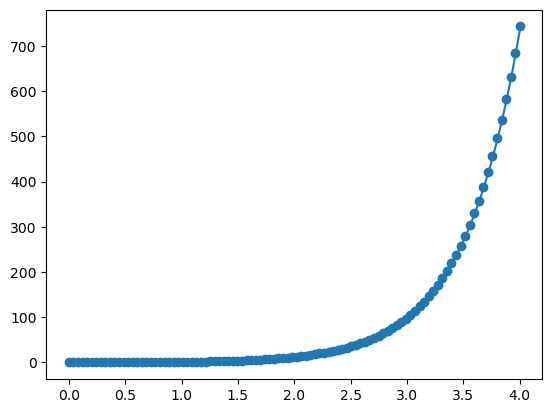

In [8]:
plt.plot(t, sol3[1])
plt.scatter(t, sol)

 ¿Como encontrar los puntos n = 1,2,3,4? Con RungeKutta4

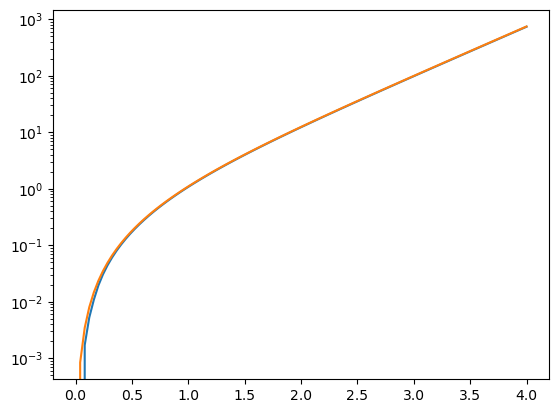

In [9]:
plt.semilogy(t, sol3[1], label='Datos 1') 
plt.semilogy(t, sol, label='Solution')